In [2]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import speed_of_light

In [115]:
def gaussian_spectrum(freq, bw):
    omega = 2 * np.pi * freq
    sigma = np.pi * bw / np.sqrt(np.log(2)) # from the paper
    return np.pi**(-1/4) * sigma**(-1/2) * np.exp(-omega**2 / (2 * sigma**2))

def gaussian_wavepacket(t, ampl, dt):
    return ampl * np.exp(-t**2/(4*dt**2))

# def gaussian_after_dispersion(ampl, t, dt, gdd):
#     envelope = np.exp(-t**2 / (4* (dt**2 - 1j*gdd/2)))
# #     phase_term = np.exp(1j * omega0 * t)
#     return ampl * envelope * phase_term

# def t_width_after_dispersion(dt, gdd):
#     return np.sqrt(t_width**2 + (1/2 * gdd / dt)**2)

def fiber_dispersion(freq, GDD):
    omega = 2 * np.pi * freq
    return np.exp(1j* 0.5 * GDD * omega**2)

def quadratic_phase(time, GDD):
    return np.exp(1j *0.5* time**2 / GDD)

def FWHM(X,Y):
    half_max = max(Y) / 2.
    d = np.sign(half_max - np.array(Y[0:-1])) - np.sign(half_max - np.array(Y[1:]))
    left_idx = np.where(d > 0)[0]
    right_idx = np.where(d < 0)[-1]
    return X[right_idx] - X[left_idx] # return the difference (full width half max)

In [126]:
bw = 401e9
GDD = 9.909 * 1e-12**2 # ps**2

freq_vec, df = np.linspace(-1e13, 1e13, int(1e5+1), retstep = True)
spectrum = gaussian_spectrum(freq_vec, bw)
pulse = np.fft.fft(spectrum)


# Fiber dispersion
spectrum_after_fiber = fiber_dispersion(freq_vec, GDD) * spectrum


#FFT to time domain
new_pulse = np.fft.fft(spectrum_after_fiber)
time_vec = np.fft.fftfreq(spectrum.size, df)


# Lens pulse
lensed_pulse = np.abs(new_pulse)
lensed_pulse2 = new_pulse * quadratic_phase(time_vec, GDD)


# IFFT to frequency domain
new_spectrum = np.fft.ifft(lensed_pulse)
new_spectrum2 = np.fft.ifft(lensed_pulse2)
freq_vec2 = np.fft.fftfreq(lensed_pulse.size, np.abs(time_vec[0]-time_vec[1]))



FWHM_spectrum = FWHM(freq_vec, np.abs(spectrum)**2)
FWHM_new_spectrum = FWHM(freq_vec, np.abs(new_spectrum2)**2)

print(FWHM_spectrum/1e9, FWHM_new_spectrum/1e9, 'Compression factor:', FWHM_spectrum/FWHM_new_spectrum)

[401.] [17.8] Compression factor: [22.52808989]


(-100.0, 100.0)

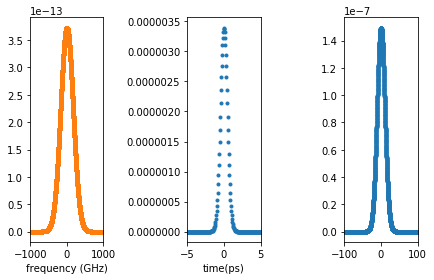

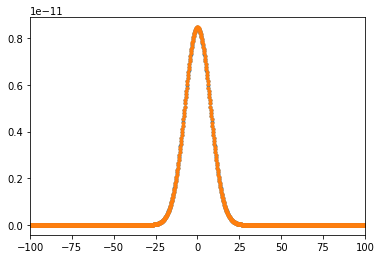

In [128]:
plt.figure()
plt.title('pulse spectrum')
plt.subplot(1,3,1)
plt.plot(freq_vec / 1e9, np.abs(spectrum)**2,'.' , label = 'input spectrum')
plt.plot(freq_vec / 1e9, np.abs(spectrum_after_fiber)**2 ,'.', label = 'input pulse')
plt.xlabel('frequency (GHz)')
plt.xlim(-1e3, 1e3)
plt.subplot(1,3,2)
plt.plot(time_vec / 1e-12, np.abs(pulse)**2, '.', label = 'input pulse')
# plt.plot(time_vec/1e-12, np.abs(new_pulse)**2, '.', label = 'new pulse')
plt.xlabel('time(ps)')
plt.xlim(-5, 5)
plt.tight_layout()
plt.subplot(1,3,3)
plt.plot(time_vec/1e-12, np.abs(new_pulse)**2, '.', label = 'new pulse')
plt.xlim(-100, 100)

plt.figure()
plt.plot(freq_vec/1e9, np.abs(new_spectrum2)**2 ,'.')
plt.plot(freq_vec2/1e9, np.abs(new_spectrum)**2 ,'.')
plt.xlim(-1e2, 1e2)
# plt.title('pulse spectrum')
# plt.subplot(1,2,1)
# plt.plot(freq_vec / 1e9, np.abs(spectrum)**2,'.' , label = 'input spectrum')
# plt.xlabel('frequency (GHz)')
# plt.xlim(-1e3, 1e3)
# plt.subplot(1,2,2)
# plt.plot(time_vec / 1e-12, np.abs(pulse)**2 ,'.', label = 'input pulse')
# plt.xlabel('time(ps)')
# plt.xlim(-5, 5)
# plt.tight_layout()

# plt.plot(freq_vec2 / 1e9, np.abs(new_spectrum)**2 / np.max(np.abs(new_spectrum)**2), '.', label = 'new spectrum')

# plt.plot(freq_vec2 / 1e9, np.abs(new_spectrum)**2 / np.max(np.abs(new_spectrum)**2), '.', label = 'new spectrum')
# plt.plot(freq_vec2 / 1e9, np.abs(new_spectrum2)**2 / np.max(np.abs(new_spectrum2)**2), '.', label = 'new spectrum')
# plt.xlim(-500, 500)
# plt.xlabel('frequency (GHz)')
# plt.legend()


# plt.figure()
# plt.title('temporal pulse shape')
# plt.plot(time_vec / 1e-12, np.abs(pulse)**2 / np.max(np.abs(pulse)**2) ,'.', label = 'input pulse')
# # plt.plot(time_vec / 1e-12, np.abs(lensed_pulse2)**2 / np.max(np.abs(lensed_pulse2)**2) ,'.', label = 'input pulse')
# plt.plot(time_vec / 1e-12, np.abs(new_pulse)**2 / np.max(np.abs(new_pulse)**2), '.', label = 'new pulse')
# plt.xlim(-5000, 5000)
# plt.xlabel('time(ps)')
# plt.legend()

# plt.figure()
# plt.title('spectral phase of new pulse')
# plt.plot(time_vec / 1e-12, np.angle(new_pulse) ,'.', label = 'new pulse')

# plt.xlim(-5000, 5000)
# plt.xlabel('time(ps)')
# plt.legend()

In [132]:
comp_spectrum = new_spectrum[np.argsort(freq_vec2)]
print(np.abs(comp_spectrum)**2 - np.abs(new_spectrum2)**2)

[-6.89306224e-44 -9.93668561e-44 -6.93725700e-44 ... -5.54436200e-44
 -1.20193874e-43 -8.08921378e-44]


In [37]:
freq_vec

array([-1.00000e+13, -9.99998e+12, -9.99996e+12, ...,  9.99996e+12,
        9.99998e+12,  1.00000e+13])

In [8]:
plt.figure()
plt.plot(freq_vec)

<IPython.core.display.Javascript object>

In [9]:
plt.figure()
plt.plot(time_vec/ 1e-12, new_pulse ,'.')
plt.xlim(-50,50)

plt.plot(time_vec/ 1e-12, np.abs(new_pulse), '.')
plt.xlim(-50,50)

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-50, 50)